In [38]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
pd.set_option("display.precision", 2)

In [40]:
#load data from csv file
df = pd.read_csv(os.path.join('Data', 'telecom_churn.csv'))
display(df.head())

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [41]:
print('Check out column names together with # nulls\n')
print('There are %d rows corresponding to clients, %d explanatory variables'%(df.shape[0], df.shape[1]))
display(df.info())

Check out column names together with # nulls

There are 3333 rows corresponding to clients, 20 explanatory variables
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 

None

In [42]:
#encode binary variable/features
print("Unique values in International Plan:",np.unique(df['International plan']))
print("Unique values in Voice mail plan:",np.unique(df['Voice mail plan']))
print("Unique values in Churn:",np.unique(df['Churn']))

Unique values in International Plan: ['No' 'Yes']
Unique values in Voice mail plan: ['No' 'Yes']
Unique values in Churn: [False  True]


These 3 variables are binary - so we can encode their values into 1 as True/Yes - 0 as False/No

In [43]:
df['International plan'] = (df['International plan'] == 'Yes').astype('float')
df['Churn'] = (df['Churn'] == 1).astype('float');

In [44]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0.0,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0
1,OH,107,415,0.0,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0
2,NJ,137,415,0.0,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0
3,OH,84,408,1.0,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0
4,OK,75,415,1.0,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0.0


We next carry out the descriptive statistics over the dataset

In [45]:
df.describe()

,Account length,Area code,International plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.0,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,0.1,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,0.3,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.0,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.0,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,0.0,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,1.0,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


We can show statistics for categorical variables

In [46]:
df.describe(include=['object', 'bool'])

,State,Voice mail plan
count,3333,3333
unique,51,2
top,WV,No
freq,106,2411


for binary variables in specific or categorical variables in general, we perform count by values

In [47]:
df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
VT     73
ID     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
MT     68
NC     68
NJ     68
WA     66
NV     66
CO     66
MA     65
RI     65
MS     65
AZ     64
FL     63
MO     63
ME     62
ND     62
NM     62
OK     61
NE     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [48]:
df['Churn'].value_counts()

0.0    2850
1.0     483
Name: Churn, dtype: int64

For `Churn` variable, we have a posive-skewed or right-skewed values (Much more 0 than 1)

We sort data by `Churn` and `Total day charge` to see if there is any correlation between daily charge and churn rate

In [49]:
df.sort_values(by=['Churn', 'Total day charge'], ascending=[False, False])

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,0.0,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1.0
985,NY,64,415,1.0,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1.0
2594,OH,115,510,1.0,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1.0
156,OH,83,415,0.0,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1.0
605,MO,112,415,0.0,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,OR,98,415,1.0,No,0,12.5,67,2.13,256.6,90,21.81,169.4,88,7.62,7.7,9,2.08,1,0.0
1986,WI,70,415,0.0,No,0,7.9,100,1.34,136.4,83,11.59,156.6,89,7.05,12.1,1,3.27,0,0.0
2753,OH,134,415,0.0,No,0,7.8,86,1.33,171.4,100,14.57,186.5,80,8.39,12.9,2,3.48,2,0.0
2736,OK,127,510,0.0,Yes,27,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0.0


In [50]:
df.sort_values(by=['Churn', 'Total day charge'], ascending=[True, False])

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,0.0,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0.0
2259,NC,210,415,0.0,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0.0
534,LA,67,510,0.0,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0.0
575,SD,114,415,0.0,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0.0
2858,AL,141,510,0.0,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,NH,117,510,1.0,No,0,54.2,100,9.21,303.2,84,25.77,171.8,84,7.73,8.6,2,2.32,1,1.0
2173,KS,47,510,1.0,No,0,47.8,120,8.13,178.9,123,15.21,152.6,96,6.87,13.3,7,3.59,0,1.0
2158,FL,166,510,1.0,No,0,47.7,89,8.11,264.4,95,22.47,235.2,97,10.58,13.2,3,3.56,0,1.0
1531,DE,138,510,1.0,No,0,46.5,104,7.91,186.0,114,15.81,167.5,95,7.54,9.6,4,2.59,4,1.0


Well, it seems like high `Daily charges` are still able to retain clients

In [51]:
df.groupby(by='Churn')['Total day charge'].mean()

Churn
0.0    29.78
1.0    35.18
Name: Total day charge, dtype: float64

Check out the correlation between variables

In [52]:
df.groupby(by='Churn')['Total day charge'].std()

Churn
0.0     8.53
1.0    11.73
Name: Total day charge, dtype: float64

In [53]:
df.groupby(by='Churn')['Total day charge'].max()

Churn
0.0    53.65
1.0    59.64
Name: Total day charge, dtype: float64

In [54]:
df.groupby(by='Churn')['Total day charge'].min()

Churn
0.0    0.0
1.0    0.0
Name: Total day charge, dtype: float64

In [55]:
df.groupby(by='Churn')['Total day charge'].median()

Churn
0.0    30.12
1.0    36.99
Name: Total day charge, dtype: float64

In [56]:
pd.Series.mode(df[df['Churn']==0]['Total day charge'])

0    29.67
dtype: float64

In [57]:
#mode
df.groupby(by='Churn')['Total day charge'].agg(lambda x:x.value_counts().index[0])

Churn
0.0    29.67
1.0    40.75
Name: Total day charge, dtype: float64

Instead we are going to make boxplot to have 5 number summary of total day charge by churn status

<AxesSubplot:xlabel='Churn', ylabel='Total day charge'>

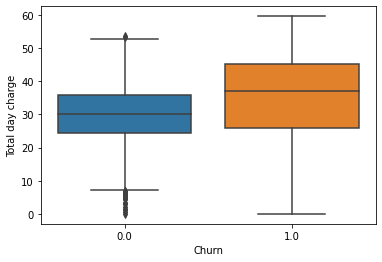

In [58]:
sns.boxplot(x='Churn', y='Total day charge', data=df)

Mean and standard deviation above show that Churn clients have a bit higher daily charges, however, the deviation for them is also higher. The maximum daily charge for existing client = 54, for churn client = 59.64

Next we find the max values in each columns

In [59]:
df.apply(np.max)

State                          WY
Account length                243
Area code                     510
International plan              1
Voice mail plan               Yes
Number vmail messages          51
Total day minutes         3.5e+02
Total day calls               165
Total day charge               60
Total eve minutes         3.6e+02
Total eve calls               170
Total eve charge               31
Total night minutes         4e+02
Total night calls             175
Total night charge             18
Total intl minutes             20
Total intl calls               20
Total intl charge             5.4
Customer service calls          9
Churn                           1
dtype: object

Find all states starting with W

In [60]:
df[df['State'].str.startswith('W')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,1.0,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0.0
26,WY,57,408,0.0,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0.0
44,WI,64,510,0.0,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0.0
49,WY,97,415,0.0,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0.0
54,WY,87,415,0.0,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1.0


In [61]:
df[df['State'].apply(lambda x: x[0] in ('W', 'w'))].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,1.0,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0.0
26,WY,57,408,0.0,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0.0
44,WI,64,510,0.0,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0.0
49,WY,97,415,0.0,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0.0
54,WY,87,415,0.0,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1.0


Encode binary variable using map

In [63]:
df['Voice mail plan'] = df['Voice mail plan'].map({'No': 0, 'Yes': 1})

statistically describe 'Total day minutes', 'Total day calls', 'Total day charge' by churn

In [68]:
describe_columns = ['Total day minutes', 'Total day calls', 'Total day charge']
df.groupby(by=['Churn'])[describe_columns].describe(percentiles=[])

Total day minutes                                   Total day calls  \
                  count    mean    std  min    50%    max           count   
Churn                                                                       
0.0              2850.0  175.18  50.18  0.0  177.2  315.6          2850.0   
1.0               483.0  206.91  69.00  0.0  217.6  350.8           483.0   

                                        Total day charge                     \
         mean    std  min    50%    max            count   mean    std  min   
Churn                                                                         
0.0    100.28  19.80  0.0  100.0  163.0           2850.0  29.78   8.53  0.0   
1.0    101.34  21.58  0.0  103.0  165.0            483.0  35.18  11.73  0.0   

                     
         50%    max  
Churn                
0.0    30.12  53.65  
1.0    36.99  59.64

group the `total day charge > 50` by churn then make sum()

In [136]:
df.groupby(by='Churn')['Total day charge'].agg(lambda x: x[x>50].sum())

Churn
0.0     776.92
1.0    2302.27
Name: Total day charge, dtype: float64

See how observations in samples are distributed in `Churn` and `International Plan`

In [152]:
pd.crosstab(index=df['Churn'], columns=[df['Voice mail plan'], df['International plan']])

Voice mail plan        0         1    
International plan   0.0  1.0  0.0 1.0
Churn                                 
0.0                 1878  130  786  56
1.0                  302  101   44  36

In [153]:
pd.crosstab(index=df['Churn'], columns=[df['Voice mail plan'], df['International plan']], normalize=True)

Voice mail plan        0           1      
International plan   0.0   1.0   0.0   1.0
Churn                                     
0.0                 0.56  0.04  0.24  0.02
1.0                 0.09  0.03  0.01  0.01

In [156]:
pd.crosstab(index=df['Churn'], columns=df['Voice mail plan'], normalize=True)

Voice mail plan,0,1
Churn,,
0.0,0.60,0.25
1.0,0.12,0.02


We can see the loyal customers occupy the biggest proportion in total with up to 85%, in which more than half of them do not use any additional service.

Calculate the number of calls by times of a day over area code

In [161]:
pd.pivot_table(df, values=['Total day calls', 'Total night calls', 'Total eve calls'], index=['Area code'], aggfunc=np.mean)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60
